## Caminata aleatoria
- El problema del borracho

In [1]:
import numpy as np

In [2]:
np.random.rand()

0.5788285097307775

In [3]:
posicion_inicial = 0  # La cantina está en cero

Si el número aleatorio en menor a 0.5 entonces el paso es hacia la izquierda, si es mayor o igual a 0.5 será hacia la izquierda.

In [4]:
pasosDerecha = 0
pasosIzquierda = 0
pasos = 10000
x0 = 0
posiciones = [x0]
for paso in range(pasos):
    decision = np.random.rand()
    if decision < .5:
        pasosIzquierda += 1
        x0 -= 1
        posiciones.append(x0)
    else:
        pasosDerecha += 1
        x0 += 1
        posiciones.append(x0)

In [5]:
pasosDerecha

4964

In [6]:
pasosIzquierda

5036

In [7]:
np.array(posiciones)

array([  0,  -1,   0, ..., -72, -73, -72])

In [8]:
import matplotlib.pyplot as plt
% matplotlib inline

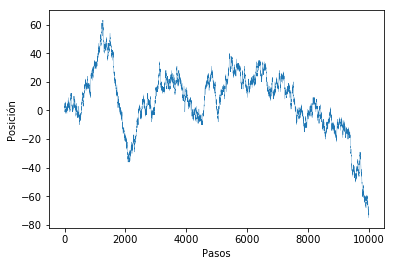

In [9]:
plt.plot(posiciones, lw = .3)
plt.xlabel("Pasos")
plt.ylabel("Posición")
plt.show;

# Actividad

10 borrachos!

In [10]:
def borracho(pasos):
    posicion_inicial = 0
    x0 = 0
    posiciones = [x0]
    for paso in range(pasos):
        decision = np.random.rand()
        if decision < .5:
            x0 -= 1
            posiciones.append(x0)
        else:
            x0 += 1
            posiciones.append(x0)
    return posiciones

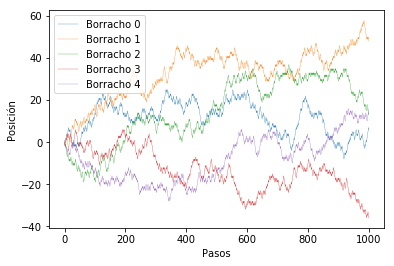

In [11]:
for r in range(5):
    plt.plot(borracho(1000), lw = .3, label = "Borracho %s" % r)
    plt.xlabel("Pasos")
    plt.ylabel("Posición")
    plt.legend()
plt.show;

Distribución uniforme

np.random.rand

Visualizar la distribución uniforme

In [12]:
conjuntoUniforme = np.random.rand(50000000)

In [13]:
conjuntoUniforme

array([ 0.56056776,  0.83558365,  0.06938697, ...,  0.19103936,
        0.52059689,  0.93489683])

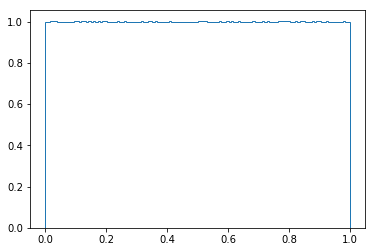

In [14]:
plt.hist(conjuntoUniforme, bins = 128, histtype = "step", normed = True);

## Movimiento en dos dimensiones

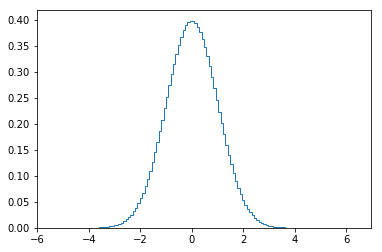

In [16]:
conjuntoUniforme = np.random.randn(100000000)
plt.hist(conjuntoUniforme, bins = 128, histtype = "step", normed = True);

## Problema (Examen del 3er parcial)

El problema consiste en encontrar el número de cruces que se generan en las fronteras de una región rectangular definida en la simulación de movimiento aleatorio en dos dimensiones.

In [32]:
n = 10000
x = np.cumsum(np.random.randn(n))
y = np.cumsum(np.random.randn(n)) # Coordenadas del conjunto de puntos o pasos

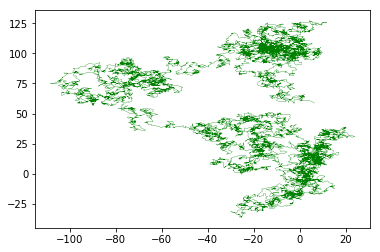

In [33]:
plt.plot(x,y, "g-", lw = .31);

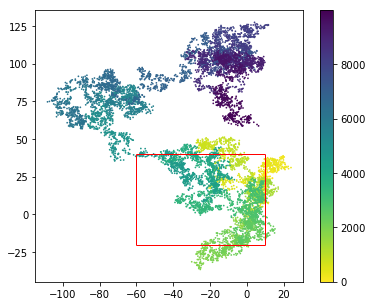

In [34]:
plt.figure(figsize = (6,5))
plt.scatter(x, y, c = range(n), lw = 0, s = 3, marker = "o", cmap = "viridis_r");
plt.hlines(40, -60, 10, color = "r", lw = 1)
plt.hlines(-20, -60, 10, color = "r", lw = 1)
plt.vlines(60, -20, 40, color = "r", lw = 1)
plt.vlines(-100, -20, 40, color = "r", lw = 1)
plt.colorbar();

In [35]:
puntos = []

In [36]:
for k in range(len(x)):
    puntos.append([x[k],y[k]]) # se insertan las coordenadas de todos los puntos en un arreglo

In [37]:
puntos

[[-1.5518523737889207, -0.12584100543479021],
 [-1.9839369014804917, 0.053886334403625696],
 [-1.2267329507735836, -0.84935135173757692],
 [-0.74685881442463908, -1.0941998222449236],
 [-0.36906785150406085, -1.0974012335398444],
 [0.64277126338513502, -1.3533417273759754],
 [-0.17423618995067558, -1.4069746497835063],
 [-0.86460245254361934, -1.9679698798755947],
 [0.67037239999794873, -0.15218804019717891],
 [2.5823667801080443, 0.81777242042573839],
 [2.569286545049303, 0.30747776032756624],
 [2.0218066620845141, 0.91256077061041319],
 [3.4898927410836125, 0.012999700796829106],
 [3.9643742657091581, 2.4391515524879184],
 [5.1158178972420387, 3.0185520874351219],
 [4.8658082153520841, 2.933132992190945],
 [5.4998181094174541, 2.9156480604675798],
 [4.074016900772266, 3.0715301130651342],
 [4.5438085013996501, 3.3489069858719551],
 [3.8781020187216049, 2.896552434640586],
 [2.6138580929527011, 3.7584784783240828],
 [0.69451258462935472, 4.052228645891204],
 [1.6656241212572211, 4.460

In [38]:
def dentro(p1):
        if(p1[1] <= 40 and p1[1] >= -20)and (p1[0] <= 10 and p1[0] >= -60):
            return True
        else:
            return False
def fuera(p1):
       if(p1[1] > 40 or p1[1] < -20) or (p1[0] > 10 or p1[0] < -60):
            return True
       else:
            return False    ## Funciones para determinar si cada punto está adentro o afuera del rectángulo

In [39]:
def cruce(p1, p2):
    if(dentro(p1)):
        if(fuera(p2)):
            return True
        else:
            return False
    elif(fuera(p1)):
        if(dentro(p2)):
            return True
        else:
            return False ## Función para determinar si hay algun cruce por la frontera en cada cada par de puntos consecutivos

In [40]:
cruces = 0 ## Se establece un contador para determinar el número de cruces en base a la función "cruce()"

In [41]:
for k in range(len(puntos) - 1):
    if(cruce(puntos[k], puntos[k + 1])):
        cruces = cruces + 1
cruces

167

In [42]:
cruces = 0 ## Se inicializa el contador para correrse de nuevo

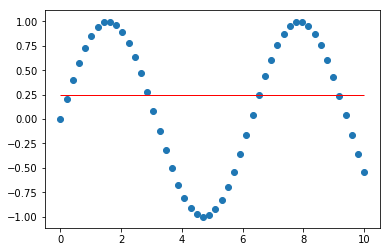

In [46]:
x = np.linspace(0,10)
y = np.sin(x)
plt.scatter(x, y)
plt.hlines(0.25, -0, 10, color = "r", lw = 1)

In [74]:
len(x)

50

In [75]:
p = []
for i in range(len(x)):
    p.append([x[i],y[i]])

In [76]:
p

[[0.0, 0.0],
 [0.20408163265306123, 0.20266793654820095],
 [0.40816326530612246, 0.39692414892492234],
 [0.61224489795918369, 0.57470604121617919],
 [0.81632653061224492, 0.7286347834693504],
 [1.0204081632653061, 0.85232156971961837],
 [1.2244897959183674, 0.94063278511248671],
 [1.4285714285714286, 0.98990307637212394],
 [1.6326530612244898, 0.99808748213471832],
 [1.8367346938775511, 0.96484630898376322],
 [2.0408163265306123, 0.89155923041100371],
 [2.2448979591836737, 0.78126802352626379],
 [2.4489795918367347, 0.63855032022660208],
 [2.6530612244897958, 0.46932961277720098],
 [2.8571428571428572, 0.28062939951435684],
 [3.0612244897959187, 0.080281674842813497],
 [3.2653061224489797, -0.12339813736217871],
 [3.4693877551020407, -0.32195631507261868],
 [3.6734693877551021, -0.50715170948451438],
 [3.8775510204081636, -0.67129779355193209],
 [4.0816326530612246, -0.80758169096833643],
 [4.2857142857142856, -0.91034694431078267],
 [4.4897959183673475, -0.97532828606704558],
 [4.6938

In [77]:
len(p)

50

In [78]:
def abajo(p1):
        if(p1[1] <= 0.25):
            return True
        else:
            return False
def arriba(p1):
       if(p1[1] > 0.25):
            return True
       else:
            return False

In [79]:
def cruce(p1, p2):
    if(arriba(p1)):
        if(abajo(p2)):
            return True
        else:
            return False
    elif(abajo(p1)):
        if(arriba(p2)):
            return True
        else:
            return False 

In [80]:
cruces = 0

In [81]:
for i in range(len(p) - 1):
    if(cruce(p[i], p[i + 1])):
        cruces = cruces + 1
cruces     ## Número de puntos que cruzan

4